# Exploring "An Appreciation" by Edgar Allan Poe

### 1. Set working directory

In [2]:
import os
os.chdir('C:\\Users\\rohan\\Desktop\\Virginia Tech\\Semester 3\\Library')

### 2. Open the text file

In [7]:
a = open("P-v1.txt","r",encoding='utf8')
b = a.readlines()

### 3. View the first 10 lines

In [16]:
b[0:10]

['\ufeffProject Gutenberg’s The Works of Edgar Allan Poe, by Edgar Allan Poe\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n',
 'with this eBook or online at www.gutenberg.org\n',
 '\n',
 '\n',
 'Title: The Works of Edgar Allan Poe\n',
 '       Volume 1 (of 5) of the Raven Edition\n']

### 4. Find the number of lines in the whole document

In [12]:
len(b)

9226

### 5. Keep only the relevant text

In [39]:
#Find line number for start and end of the text
start = b.index('AN APPRECIATION\n') 
end = b.index('End of Project Gutenberg’s The Works of Edgar Allan Poe, by Edgar Allan Poe\n')

print('The text starts at line number '+ str(start) + ' and ends at line number ' + str(end))

The text starts at line number 66 and ends at line number 8865


In [40]:
#subset text for required lines
c = b[start:end]

In [41]:
#View top 10 lines for the new subset
c[0:10]

['AN APPRECIATION\n',
 '\n',
 '\n',
 '   Caught from some unhappy master whom unmerciful Disaster\n',
 '   Followed fast and followed faster till his songs one burden bore--\n',
 '   Till the dirges of his Hope that melancholy burden bore\n',
 '         Of “never--never more!”\n',
 '\n',
 'THIS stanza from “The Raven” was recommended by James Russell Lowell as\n',
 'an inscription upon the Baltimore monument which marks the resting place\n']

In [42]:
len(c)

8799

### 6. Cleaning the dataset

In [89]:
#Join all the lines
d = ' '.join(c)
d[0:100]

'AN APPRECIATION\n \n \n    Caught from some unhappy master whom unmerciful Disaster\n    Followed fast a'

In [90]:
#Convert to lower case
e = d.lower()
e[0:10]

'an appreci'

In [91]:
#return only the words from the string
import re
f = re.findall(r"[\w']+", e)

In [92]:
#view top 10 words
f[0:10]

['an',
 'appreciation',
 'caught',
 'from',
 'some',
 'unhappy',
 'master',
 'whom',
 'unmerciful',
 'disaster']

### 7. Find the word frequency

In [116]:
#Word frequency
from collections import Counter
word_count = Counter(f)

In [117]:
#convert counter to pandas dataframe
import pandas as pd
word_data = pd.DataFrame.from_dict(word_count, orient='index').reset_index().rename(columns = {'index' : 'Word',0 : 'Count'})

In [155]:
#Find total number of words used and the number of distinct words
print('The number of distinct words used is '+ str(len(word_data)) + ' , and the total number of words is ' + str(sum(word_data['Count'])))

The number of distinct words used is 9606 , and the total number of words is 91952


In [118]:
#View top 10 rows
word_data[0:10]

,Word,Count
0,an,361
1,appreciation,3
2,caught,8
3,from,496
4,some,211
5,unhappy,4
6,master,20
7,whom,22
8,unmerciful,2
9,disaster,3


In [122]:
#Sort the data
word_data = word_data.sort_values('Count',ascending=False)
word_data[0:10]

,Word,Count
20,the,7067
22,of,4221
12,and,2401
56,to,2277
84,a,2101
53,in,1924
788,i,1296
236,it,1155
24,that,1046
31,was,1041


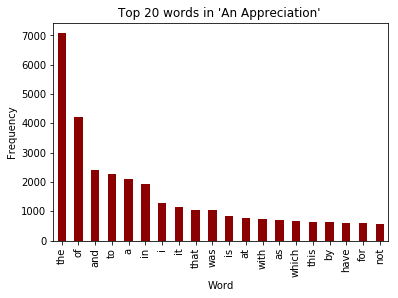

In [145]:
#Plot the top 20 words
import matplotlib.pyplot as plt
word_data[0:20].plot(x='Word',y='Count',kind='bar',color='darkred',legend=False)
plt.title("Top 20 words in 'An Appreciation' ")
plt.ylabel('Frequency')
plt.show()

### 8. Remove the stop words

In [146]:
#import natural language toolkit
from nltk.corpus import stopwords

In [149]:
#filter the required words
filtered_words = [word for word in word_data['Word'] if word not in stopwords.words('english')]

In [148]:
#View top 10 words
filtered_words[0:10]

['upon',
 'one',
 'would',
 'could',
 'us',
 'found',
 'great',
 'time',
 'much',
 'first']

In [151]:
#Filter from dataset
word_filtered = word_data[word_data['Word'].isin(filtered_words)]
word_filtered[0:10]

,Word,Count
39,upon,391
17,one,311
225,would,236
471,could,231
999,us,157
254,found,153
970,great,130
674,time,129
482,much,129
141,first,126


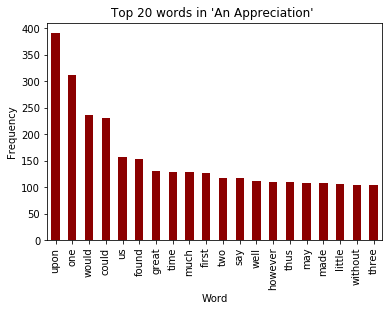

In [153]:
word_filtered[0:20].plot(x='Word',y='Count',kind='bar',color='darkred',legend=False)
plt.title("Top 20 words in 'An Appreciation' ")
plt.ylabel('Frequency')
plt.show()

### 9. Dispersion plot - understanding the usage of word in text

In [198]:
#Function to plot a dispersion graph
def dispersion(word):
    d = list()
    for i in range(0,len(f)):
        if f[i] == word:
            d.append(i)

    fig, ax = plt.subplots()
    ax.vlines(d, 0, 1, edgecolor="black") # <-- ANSWER
    ax.set_xlim([0, len(f)]) # set the lower and upper limits of graph
    ax.set_xlabel('Word number')
    ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
    ax.set_ylabel(word) # turn off by droping this line
    ax.set_yticks([])
    fig = plt.gcf()
    fig.set_size_inches(20, 5)
    plt.show()

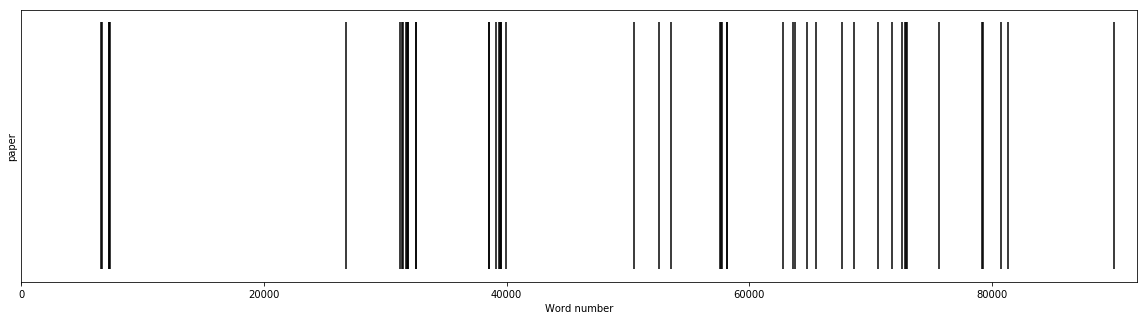

In [199]:
dispersion('paper')

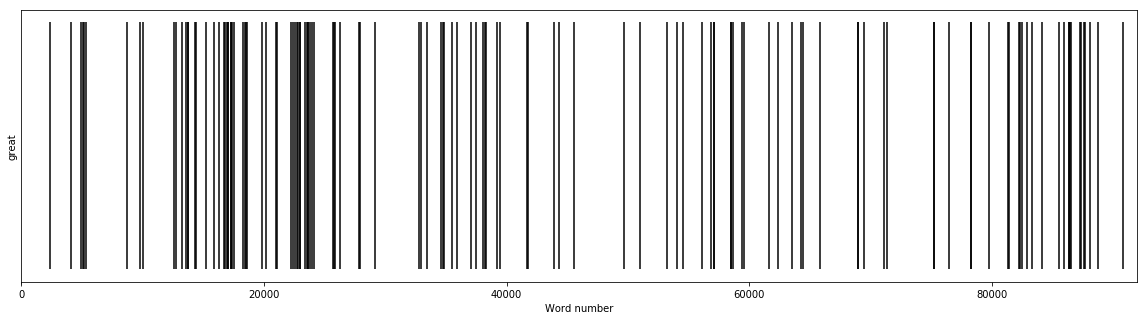

In [200]:
dispersion('great')